In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
# Standard Scaler
from sklearn.preprocessing import StandardScaler
# Robust Scaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'/voc/work'

In [2]:
data = pd.read_csv('HealthCareDatasetCSVFile.csv')

In [3]:
print("Getting data shape")
print(data.shape)

Getting data shape
(303, 14)


In [4]:
print("Printing first lines of data")
data.head()

Printing first lines of data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print("Getting dataset info")
data.info()

Getting dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
print("Checking for null values")
data.isnull().sum()

Checking for null values


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
print("Describing the data")
data.describe()

Describing the data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
print("Duplicate rows")
duplicate = data[data.duplicated()]
print(duplicate)

Duplicate rows
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [9]:
print("Dropping duplicated rows")
duplicate = data.drop_duplicates()
print(duplicate)

Dropping duplicated rows
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  


In [10]:
print("Sorting patients into high risk")
high=data[data['target']==1]
high.head()

Sorting patients into high risk


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
print("Describing the data")
high.describe()

Describing the data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [12]:
print("Sorting patients into low risk")
low=data[data['target']==0]
low.head()

Sorting patients into low risk


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [13]:
print("Describing the data")
low.describe()

Describing the data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [14]:
print("Catagorical variables: Sex, fbs, and exang")

Catagorical variables: Sex, fbs, and exang


In [15]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

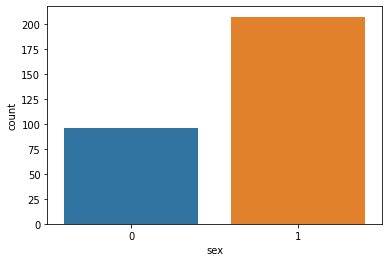

In [16]:
sns.countplot(x ='sex', data = data)

In [17]:
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot: xlabel='fbs', ylabel='count'>

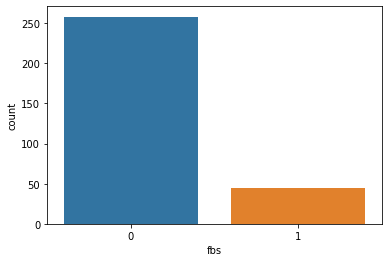

In [18]:
sns.countplot(x ='fbs', data = data)

In [19]:
data['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

<AxesSubplot: xlabel='exang', ylabel='count'>

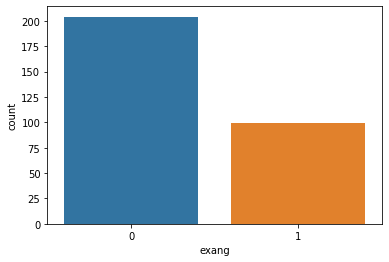

In [20]:
sns.countplot(x ='exang', data = data)

<AxesSubplot: xlabel='age', ylabel='count'>

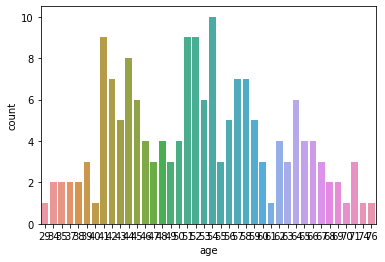

In [21]:
sns.countplot(x ='age', data = high)

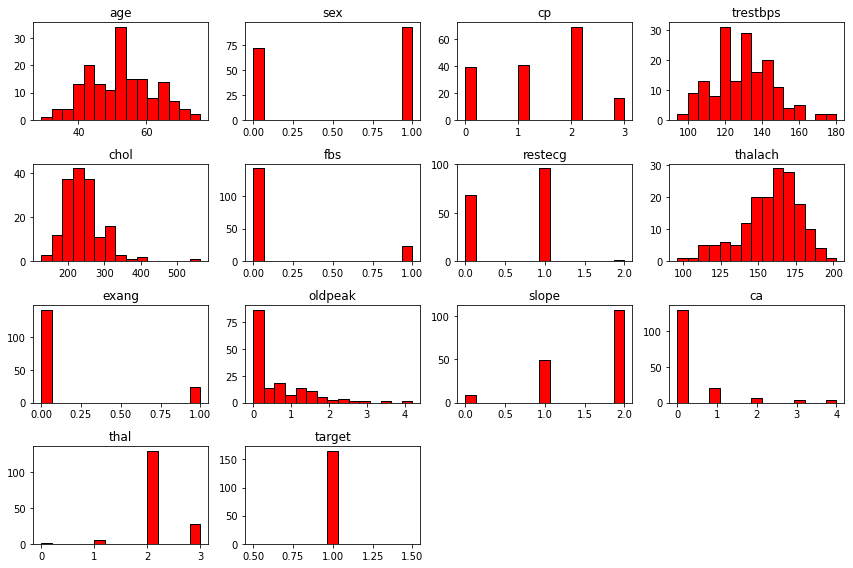

In [22]:
high.hist(bins=15,color='r',edgecolor='black',linewidth=1.0,grid=False)
plt.tight_layout(rect=(0,0,2,2))

Finding the relation between the sex catagory and the age catagory


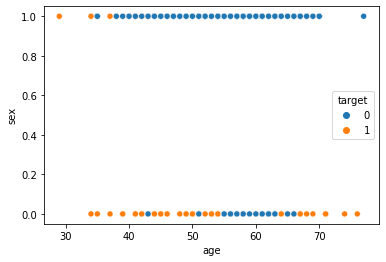

In [23]:
print("Finding the relation between the sex catagory and the age catagory")
g=sns.scatterplot(x= "age", y ="sex", hue='target',data=data);

Looking is heart attacks can be detected based on trestbps of a patient


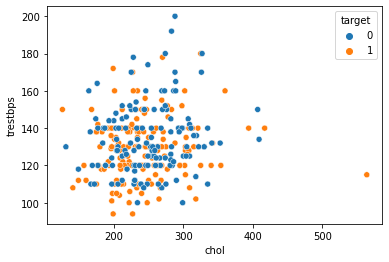

In [24]:
print("Looking is heart attacks can be detected based on trestbps of a patient")
g=sns.scatterplot(x= "chol", y ="trestbps", hue='target',data=data);

Showing the relationship between cholesterol levels and a age as a factor


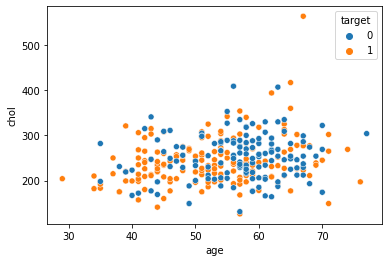

In [25]:
print("Showing the relationship between cholesterol levels and a age as a factor")
g=sns.scatterplot(x= "age", y ="chol", hue='target',data=data);

Showing what the relationship between peak exercising and the occurrence of a heart attack


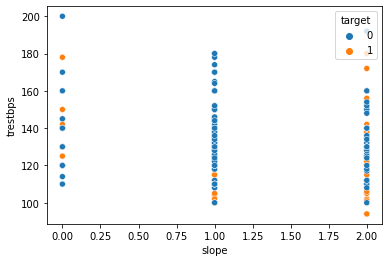

In [26]:
print("Showing what the relationship between peak exercising and the occurrence of a heart attack")
g=sns.scatterplot(x= "slope", y ="trestbps", hue='target',data=data);

Checking if thalassemia is a major cause of CVD


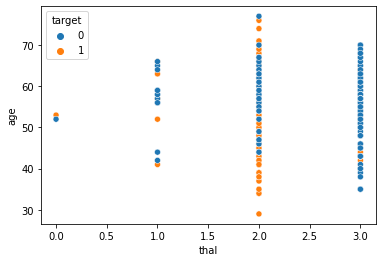

In [27]:
print("Checking if thalassemia is a major cause of CVD")
g=sns.scatterplot(x= "thal", y ="age", hue='target',data=data);

In [ ]:
print("Looking at the relationship between CVD and the remaning variables")
sns.pairplot(data=data)

Looking at the relationship between CVD and the remaning variables


In [ ]:
print("Training logistic regression model")
y = data.pop('target')
x = data

In [ ]:
print("Getting regression constant for testing")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 4)

print('x_train:',x_train.shape)
print('x_test :',x_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)